# 1D Impulse (Instantaneous Source) Solution

The figure below depicts the physical system as the three panels on the left, and the analytical model system at times larger than or equal to zero times.

![](impulsesetup.png)

**Upper Left Panel** is a depiction of the physical system at time less than zero. The concentration is zero everywhere, and the cooresponding profile is not plotted

**Middle Left Panel** is a depiction of the physical system and the concentration profile along the x-axis at time equal zero (like the Big Bang!). At x = 0, the concentration is suddenly raised to a value of $C_0 \cdot \delta x = \frac{M}{A}$ at the origin, x=0. This condition represents a [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function) input and is a suitable approximation of a sudden release in a source zone that has a constant concentration. The concentration away from the origin is still zero.  The right middle panel  is a profile plot of concentration (the Delta function is unplottable, so the cartoon must suffice).

**Bottom Left Panel** is a depiction of the physical system and the concentration profile along the x-axis at some time greater than zero. The source mass center has moved to the right of the origin a distance determined by the species velocity and dispersed along the translational front proportional to the dispersivity in the system. 

The analytical solution for this situation is given in [Bear, J. (1972) *Dynamics of Fluids in Porous Media* McGraw Hill (pp. 628-629)](https://d1wqtxts1xzle7.cloudfront.net/31171747/195055535-libre.pdf?1392371142=&response-content-disposition=inline%3B+filename%3DDynamics_of_fluids_in_porous_media.pdf&Expires=1695231543&Signature=fcj7Wef3HIA7wlTx~LJhmfFgQJIrRLnrwEgqd2KIjnsouiRrFZpLAgMw-gRJ7oxI1~h89bo-YpAQuhLHZc1vtNFq5d0QBrxwYRbAvr5jztdUDHWZrfjBPYBgujy5WCnrrtoN7GKrziCwbk7mDi1AUyBnC4RDidrKgBV-bMOpJR4ZR8~L6BTEPXhBAQJbLohdpWi8Ni6VUl33~rEQaum8NMcY11P6okNvXbXKft3vdYwjEK5NXezeVe6dQpYIiBcyPVqkFahRD9CFLXLHZsxXryzDT~x9pszx86ka0kXYN9y1Y7RzyAgZQaB5YWD8XZhK4w2PoIEVgIvGeuCxxt099Q__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

It is also presented in the textbook as equation 6.18

$$ C(x,t) = \frac{M}{4 \pi D_x t} exp(- \frac{(x-vt)^2}{4 D_x t})$$

where <br>
- $M$ is mass injected per unit cross-sectional area,<br>
- $D_x = \alpha_L*v+D_d$ is the hydrodynamic dispersion (plus any molecular diffusion),<br>
- $v = \frac{q}{n}$ is the pore velocity

The solution is applicable for porous media flow, where the velocity is the pore velocity (seepage velocity divided by the porosity). 

:::{note}
We should probably check that it is a solution, by differentiating the solution once by $x$ then that result again by $x$, then once by $t$, and putting these results back into the ADE to verify that the result indeed fits the PDE.  However out of an overabundace of laziness we will simply assume the result is correct because it is copied from a book.
:::

## Building a Modeling Tool

This particular model is all over the internet as an on-line calculator,  but sometimes we have need to build our own version.  In Jupyter Notebooks running a python kernel we need to script the equation above and structure the equation into a useable function.

### Forward define the functions
This step is important, the functions must be defined before they are called -- in an interpreter, this is usually done at the top of the script.  Other scripting languages store the scripts at the end (JavaScript usually keeps scripts at end of the file -- it internally promotes then to the top before it runs its JIT bytecode compiler).

In a compiled language, this step is not as necessary (predefinition is, location not so much). 

These prototype functions are usually written so that they are organic with respect to their variables, so there is no leakage -- in these two functions, the input list is just names, and the output is just a value that must be assigned in the calling script.

In [1]:
def impulse1D(distance,time,mass,dispersion,velocity):
    import math
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    impulse1D = (mass/term1)*term2
    return(impulse1D)

## Concentration Profile

Making a profile plot is fairly straightforward, a script to do so is listed below.

Consider a case where $10,000~ppm$ of a conservative constituient is suddenly released into a volume of $1~m^3$ of groundwater moving at a seepage (pore) velocity of $1~\frac{m}{day}$ in a flow system with a dispersion coefficient of $1~\frac{m^2}{day}$.  

Produce a concentration profile for the system at 75 days.

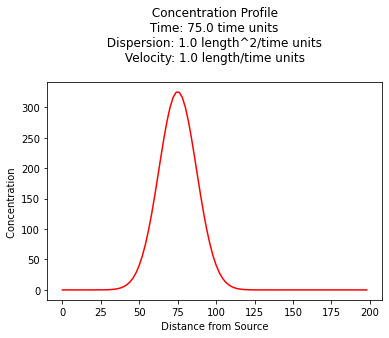

In [2]:
thick       = 1.0
width       = 100.0
length      = 0.01 # small but non-zero
volume      = thick*width*length
porosity    = 1.0
c0          = 10000.0 # kg/m^3
mass        = (c0*volume)/(porosity)
dispersion  = 1.0 #m^2/day
velocity    = 1.0 #m/day
deltax      = 2.0 #meters
howmany     = 100 #how many points to compute
x = [] #meters
for i in range(howmany):
    x.append(float(i)*deltax)
    
time        = 75.0 # days

c = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    c[i]=impulse1D(x[i],time,mass,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")


## Concentration History

Its also quite reasonable to build a history (concentration versus time at some location) - the script is practically the same, except time is the variable instead of space.

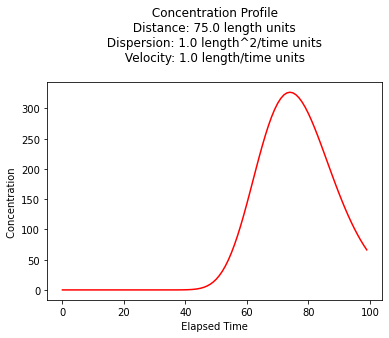

In [3]:
thick       = 1.0
width       = 100.0
length      = 0.01 # small but non-zero
volume      = thick*width*length
porosity    = 1.0
c0          = 10000.0 # kg/m^3
mass        = (c0*volume)/(porosity)
dispersion  = 1.0 #m^2/day
velocity    = 1.0 #m/day
deltat      = 1.0 #days
howmany     = 100 #how many points to compute
t = [] #meters
for i in range(howmany):
    t.append((float(i)+0.00001)*deltat)
    
space        = 75.0 # meters

c = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    c[i]=impulse1D(space,t[i],mass,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Distance: " + repr(time) + " length units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Elapsed Time ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")

A spreadsheet implementation is available below in the references.

## References

1. [Bear, J. (1972) *Dynamics of Fluids in Porous Media* McGraw Hill (pp. 628-629)](https://www.amazon.com/Dynamics-Fluids-Porous-Mechanical-Engineering/dp/0486656756)
2. [**SSANTS2.xlsm** (Excel Macro Sheet(s)) - Choose Tabsheet **1DIMPAD**](http://54.243.252.9/ce-5364-webroot/ce5364notes/chapters/7analyticalmodels/SSANTS2.xlsm)
3. [Yuan, D, (1995)  *Accurate approximations for one-, two-, and three-dimensional groundwater mass transport from an exponentially decaying contaminant source.* MS Thesis, Department of Civil and Environmental Engineering, University of Houston. ](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/thesis/yuan_thesis/Groundwater_transport.pdf)
4. [Chuang, Lu-Chia, (1998) *A guidance system for choosing analytical contaminant transport models.* Doctoral Dissertation, Department of Civil and Environmental Engineering, University of Houston, Houston, Texas. 222p.](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/thesis/ants_dissertation/Luke_Chuang.pdf)
5. [Analytical solutions for one-, two-, and three-dimensional solute transport in ground-water systems with uniform flow
Open-File Report 89-56](https://pubs.usgs.gov/publication/ofr8956)
6. [Analytical solutions for one-, two-, and three-dimensional solute transport in ground-water systems with uniform flow
Techniques of Water-Resources Investigations 03-B7 (supercedes above reference)](https://pubs.usgs.gov/publication/twri03B7)